# Data visualizations

## Seaborn with heatmaps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
oo = pd.read_csv('data/olympics.csv',skiprows=4)
oo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Using the Olympic dataset, present a summary of the total medals won by participating countries in the 2008 Olympics.

In [4]:
lo = oo[oo.Edition==2008]
lo.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27174,Beijing,2008,Aquatics,Diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
27175,Beijing,2008,Aquatics,Diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold


In [5]:
g = lo.groupby(['NOC','Medal']).size()

In [7]:
g = g.unstack('Medal',fill_value=0)
g

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1,0,0
ALG,1,0,1
ARG,31,20,0
ARM,6,0,0
AUS,76,31,42
AUT,2,0,1
AZE,4,1,2
BAH,1,0,4
BEL,0,1,4


In [9]:
g = g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']]
g

Medal,Gold,Silver,Bronze
NOC,,,
USA,125,109,81
CHN,74,53,57
RUS,43,44,56
GER,42,16,43
KOR,41,11,26
NED,40,18,4
AUS,31,42,76
GBR,31,25,21
FRA,25,23,28


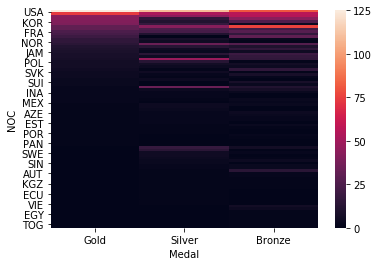

In [10]:
sns.heatmap(g)

In [11]:
g = g.transpose()
g

NOC,USA,CHN,RUS,GER,KOR,NED,AUS,GBR,FRA,JPN,...,VIE,ARM,TPE,AFG,EGY,ISR,MDA,MRI,TOG,VEN
Medal,,,,,,,,,,,,,,,,,,,,,
Gold,125,74,43,42,41,40,31,31,25,23,...,0,0,0,0,0,0,0,0,0,0
Silver,109,53,44,16,11,18,42,25,23,11,...,1,0,0,0,0,0,0,0,0,0
Bronze,81,57,56,43,26,4,76,21,28,17,...,0,6,4,1,1,1,1,1,1,1


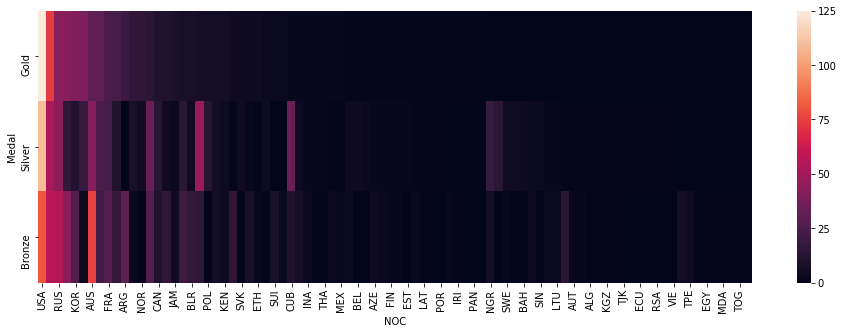

In [12]:
plt.figure(figsize=(16,5))
sns.heatmap(g)

## Creating your own colormaps

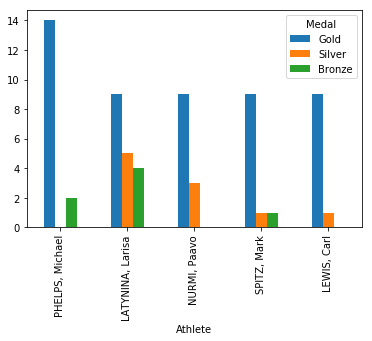

In [13]:
g = oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0)
g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']].head().plot(kind='bar')

In [14]:
from matplotlib.colors import ListedColormap

In [15]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

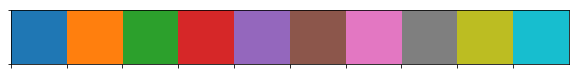

In [16]:
sns.palplot(sns.color_palette())

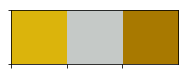

In [17]:
gsb = ['#dbb40c','#c5c9c7','#a87900']
sns.palplot(sns.color_palette(gsb))

In [18]:
my_gsb = ListedColormap(sns.color_palette(gsb))

In [19]:
g = oo.groupby(['Athlete','Medal']).size().unstack('Medal',fill_value=0)
g = g.sort_values(['Gold','Silver','Bronze'],ascending=False)[['Gold','Silver','Bronze']]

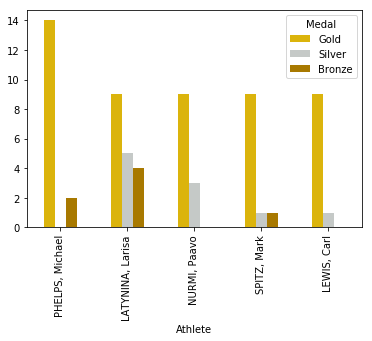

In [20]:
g.head().plot(kind='bar',colormap=my_gsb)